In [7]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

In [8]:
## load the historical nfl data
df = pd.read_csv('../data/nfl_data.csv')

In [9]:
## filter the data to include only games where the sportsbook spread was 6
df = df[df['sportsbook_spread'] == 6]
df.shape

(185, 19)

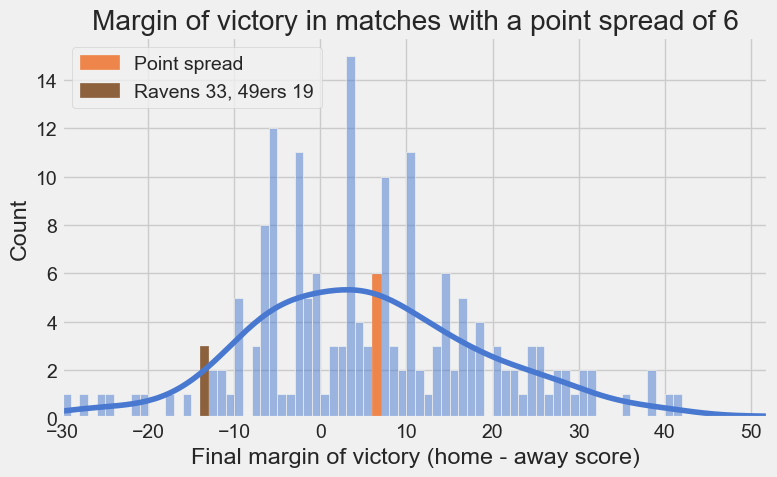

In [14]:
## draw a histogram of the true margin of victory with bins that are 1 unit wide

# esthetic settings
#sns.set_style("darkgrid")
plt.style.use('fivethirtyeight')

colors=sns.color_palette("muted")
#fontdict = {'fontsize': 16,
#            'weight': 'normal',
#            'horizontalalignment': 'center'}
fontdict={}

title_str = "Margin of victory in matches with a point spread of 6"

# change the aspect ratio of the figure to be suited for blog posts
plt.gcf().set_size_inches(8, 5)

# draw the histogram with kde plot overlay
ax = sns.histplot(df['true_margin'],
                  bins=range(-30, 52, 1),
                  kde=True,
                  color=colors[0])
                # label='Previous matches',

## draw a vertical line at 6
#plt.axvline(x=6, color=colors[1], label='Point spread')

plt.xlabel("Final margin of victory (home - away score)", fontdict=fontdict)
plt.ylabel('Count', fontdict=fontdict)
plt.title(title_str, fontdict=fontdict)
plt.xlim(-30, 52)

# color the bin corresponding to x-axis = -14 a different color
plt.axvspan(6, 7, ymin=0, ymax=.38, color=colors[1], alpha=1, label='Point spread')
plt.axvspan(-14, -13, ymin=0, ymax=.19, color=colors[5], alpha=1, label='Ravens 33, 49ers 19') # got lazy with ymax here
plt.legend(loc='upper left')
plt.tight_layout()

# save figure to disk
plt.savefig('spread_6.png', dpi=300)

In [17]:
# compute the number of matches where the favorite home team covered the spread
df["home_covered"] = df["true_margin"] > df["sportsbook_spread"]
n_home_covers = df["home_covered"].sum()
prop_home_covers = df["home_covered"].mean()
print(f"The home team covered the spread in {n_home_covers} out of {df.shape[0]} matches ({prop_home_covers:.2%})")
print(f"The mean margin of victory was {df['true_margin'].mean():.2f} points")
print(f"The median margin of victory was {df['true_margin'].median():.2f} points")
print(f"The mean absolute deviation between margin of victory and point spread was {df['true_margin'].sub(df['sportsbook_spread']).abs().mean():.2f} points")

The home team covered the spread in 82 out of 185 matches (44.32%)
The mean margin of victory was 5.57 points
The median margin of victory was 4.00 points
The mean absolute deviation between margin of victory and point spread was 10.88 points


In [12]:
df["true_margin"].min(), df["true_margin"].max()

(-30.0, 52.0)

In [15]:
# show rows of dataframe corresponding to the minimum and maximum of true_margin
df[df["true_margin"] == df["true_margin"].min()]

,Unnamed: 0,Season,Type,Week,Timeframe,DayString,TimeString,DayOfWeek,DateTimeString,LastUpdated,Status,AwayTeam,AwayScore,AwayTeamHasWon,HomeTeam,sportsbook_spread,sportsbook_total,true_margin,true_total,home_covered
3445,13,2015,RegularSeason,17,Week 17,1/3/16,4:25 PM ET,Sun,1/3/16 @ 4:25 PM ET,7/26/2021 6:06:07 PM,Final,SEA,36.0,True,ARI,6.0,47.0,-30.0,42.0,False


In [16]:
df[df["true_margin"] == df["true_margin"].max()]

,Unnamed: 0,Season,Type,Week,Timeframe,DayString,TimeString,DayOfWeek,DateTimeString,LastUpdated,Status,AwayTeam,AwayScore,AwayTeamHasWon,HomeTeam,sportsbook_spread,sportsbook_total,true_margin,true_total,home_covered
3291,11,2014,RegularSeason,13,Week 13,11/30/14,1:00 PM ET,Sun,11/30/14 @ 1:00 PM ET,7/26/2021 6:06:07 PM,Final,LV,0.0,False,LAR,6.0,43.0,52.0,52.0,True
